#### Imports

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

#### Maze Definition

In [2]:
maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

start = (0, 0)
goal = (4, 4)

#### Heuristic Function

In [3]:
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

#### Get Valid Neighbors

In [4]:
def get_neighbors(node, maze):
    directions = [(-1,0), (1,0), (0,-1), (0,1)]
    neighbors = []

    for d in directions:
        r, c = node[0] + d[0], node[1] + d[1]
        if 0 <= r < maze.shape[0] and 0 <= c < maze.shape[1]:
            if maze[r][c] == 0:
                neighbors.append((r, c))
    return neighbors

#### A* Search Algorithm

In [5]:
def a_star(maze, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))

    came_from = {}
    g_score = {start: 0}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in get_neighbors(current, maze):
            temp_g = g_score[current] + 1

            if neighbor not in g_score or temp_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = temp_g
                f_score = temp_g + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score, neighbor))

    return None

#### Run the Algorithm

In [6]:
path = a_star(maze, start, goal)

if path is None:
    print("❌ No path found!")
else:
    print("✅ Path found:", path)

✅ Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


#### Visualization Function

In [7]:
def visualize_maze(maze, path, start, goal, filename):
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap="gray_r")

    if path:
        x = [p[1] for p in path]
        y = [p[0] for p in path]
        ax.plot(x, y, color='red', linewidth=2)

    ax.scatter(start[1], start[0], c='green', s=100, label='Start')
    ax.scatter(goal[1], goal[0], c='blue', s=100, label='Goal')

    ax.legend()
    ax.set_title("A* Maze Solver")

    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

#### Generating & Saving Figure

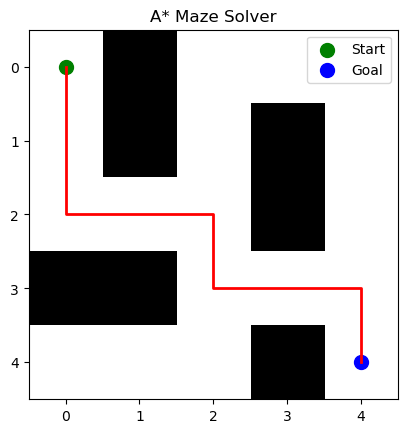

In [8]:
visualize_maze(
    maze,
    path,
    start,
    goal,
    filename="a_star_maze_solution.png"
)

#### Unreachable Case Test

In [9]:
maze_blocked = np.ones((5,5))
maze_blocked[0,0] = 0
maze_blocked[4,4] = 0

print(a_star(maze_blocked, start, goal))

None
